# NLP Sentiment Analysis
75 - 20 - 5

Source: inspired by https://huggingface.co/, https://www.kaggle.com/

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from lime.lime_text import LimeTextExplainer
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', True)

In [2]:
CM_FONT_SIZE = 12
LIME_NEG_REVIEW = 5
LIME_POS_REVIEW = 12508
CLASS_NAMES = ['negative(0)','positive(1)']

In [3]:
import os
from datetime import datetime as dt

OUTPUT_PATH = 'output'
time_str = dt.now().strftime("%H-%M-%S")
date_str = dt.now().strftime("%Y_%m_%d")

if not os.path.exists(f'{OUTPUT_PATH}/{date_str}'):
    os.makedirs(f'{OUTPUT_PATH}/{date_str}')

# IMDB Dataset

In [4]:
# import re
# import nltk
# nltk.download('omw-1.4')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('wordnet')
# stopwords = nltk.corpus.stopwords.words('english')

In [5]:
# from pywsd.utils import lemmatize_sentence

Dataset structure:
```
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
})
```

In [6]:
# import datasets
# from datasets import load_dataset

In [7]:
# The full train and test data, concatenated together.
# data = load_dataset('imdb', split='train+test')

In [8]:
# data['text'][2]

In [9]:
# df_imdb = pd.DataFrame(data=data, columns=data.features)
# df_imdb.head()

In [10]:
# df_imdb.hist();

# Preprocess data

In [11]:
# def clean_text (row):

#     cl_text =  row['text'].lower()

#     cl_text = re.sub(r'<.*?>', '', cl_text) # remove HTML tags

#     cl_text = re.sub(r'\d+', '', cl_text)  # remove numbers
   
#     cl_text = cl_text.split()
#     cl_text = [i for i in cl_text if i not in stopwords] # remove stopwords

#     cl_text = [re.sub(r'\W', ' ', s) for s in cl_text]
#     cl_text = ' '.join(cl_text)
  
#     cl_text = lemmatize_sentence(cl_text) # lemmatization
#     cl_text = ' '.join(cl_text)

#     return cl_text

In [12]:
# df_imdb['review_preproc'] = df_imdb.apply(clean_text, axis=1)

In [13]:
# df_imdb

# Store data

In [14]:
# df_imdb.to_csv('./data_imdb/data_imdb.csv', index=False)

# Load data

The data are stored locally, it gives us full control over the data and also guarantees that we have the same data for each experiment, the owner of the online data can change it without our knowledge, or even delete it

In [15]:
data = pd.read_csv('./data_imdb/data_imdb.csv')

# Visualization of Review Words

In [16]:
from wordcloud import WordCloud

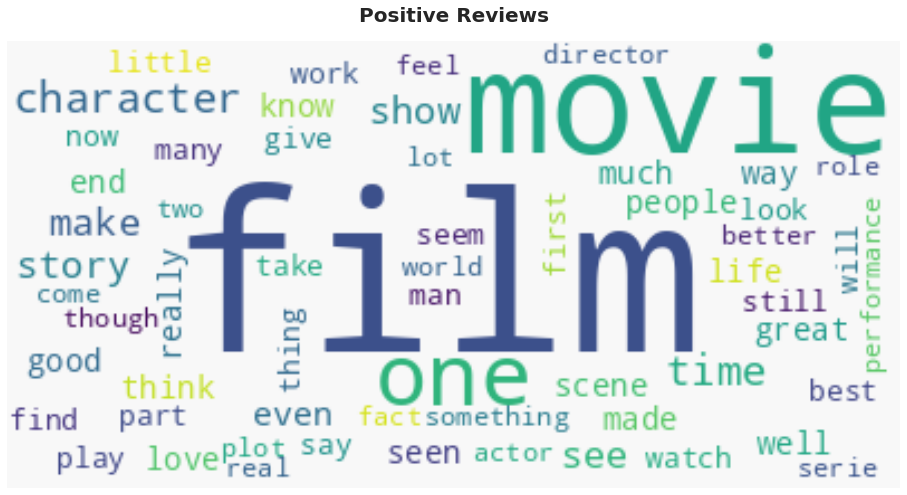

In [17]:
np.random.seed(2)
sns.set(rc={'figure.figsize':(16,9)})
reviews_pos = ' '.join(data[data['label']==1]['text'].tolist())

wordcloud_pos = WordCloud(background_color="#f8f8f8", 
                      relative_scaling=1,
                      max_words=60,  
                      min_word_length=3                  
                      ).generate(reviews_pos)
plt.figure()
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Positive Reviews',size=20, pad=20).set_weight('bold')
plt.savefig(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_positive_reviews.png')
plt.show()

In [18]:
word_freq_pos = wordcloud_pos.process_text(reviews_pos)
word_freq_list_pos = [(word, freq) for word, freq in word_freq_pos.items()]
word_freq_list_pos = sorted(word_freq_list_pos, key=lambda x: x[1], reverse=True)
print(word_freq_list_pos[:100])

[('film', 35321), ('movie', 33189), ('one', 20150), ('character', 9891), ('time', 9684), ('make', 8806), ('story', 8633), ('see', 8507), ('show', 8276), ('even', 7324), ('way', 7079), ('good', 6962), ('much', 6907), ('great', 6875), ('think', 6813), ('well', 6623), ('people', 6430), ('really', 6295), ('scene', 6260), ('made', 6077), ('love', 5870), ('life', 5722), ('end', 5629), ('know', 5500), ('seen', 5492), ('watch', 5102), ('will', 5053), ('still', 4927), ('many', 4769), ('best', 4747), ('play', 4737), ('look', 4705), ('work', 4537), ('say', 4428), ('thing', 4401), ('take', 4339), ('seem', 4324), ('first', 4322), ('give', 4314), ('man', 4289), ('little', 4275), ('part', 4200), ('now', 4175), ('find', 4100), ('actor', 3859), ('two', 3821), ('come', 3805), ('plot', 3698), ('role', 3690), ('lot', 3620), ('though', 3482), ('something', 3468), ('world', 3431), ('performance', 3427), ('director', 3372), ('fact', 3286), ('serie', 3248), ('feel', 3230), ('better', 3141), ('real', 3110), ('

In [19]:
# how many words?
len(word_freq_list_pos)

96288

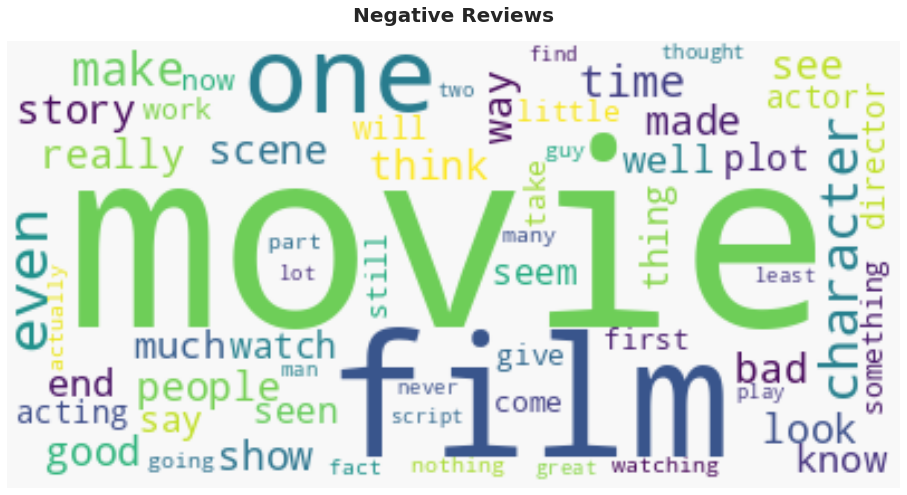

In [20]:
np.random.seed(2)
sns.set(rc={'figure.figsize':(16,9)})
reviews_neg = ' '.join(data[data['label']==0]['text'].tolist())

wordcloud_neg = WordCloud(background_color="#f8f8f8", 
                      relative_scaling=1,
                      max_words=60, 
                      min_word_length=3                   
                      ).generate(reviews_neg)
plt.figure()
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Negative Reviews',size=20, pad=20).set_weight('bold')
plt.savefig(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_negative_reviews.png')
plt.show()

In [21]:
word_freq_neg = wordcloud_neg.process_text(reviews_neg)
word_freq_list_neg = [(word, freq) for word, freq in word_freq_neg.items()]
word_freq_list_neg = sorted(word_freq_list_neg, key=lambda x: x[1], reverse=True)
print(word_freq_list_neg[:100])

[('movie', 40573), ('film', 31225), ('one', 20013), ('even', 11160), ('character', 9971), ('make', 8582), ('time', 8306), ('see', 7477), ('story', 7398), ('really', 7254), ('people', 7112), ('bad', 6955), ('good', 6940), ('made', 6891), ('way', 6786), ('scene', 6737), ('think', 6653), ('show', 6636), ('look', 6490), ('know', 6155), ('much', 6063), ('well', 6032), ('end', 5975), ('seem', 5660), ('plot', 5651), ('thing', 5480), ('say', 5395), ('watch', 5356), ('seen', 5281), ('actor', 4729), ('acting', 4673), ('will', 4569), ('director', 4407), ('something', 4229), ('little', 4167), ('take', 4133), ('now', 4086), ('work', 4005), ('first', 3989), ('come', 3882), ('give', 3872), ('still', 3855), ('nothing', 3838), ('going', 3790), ('fact', 3753), ('actually', 3742), ('guy', 3735), ('watching', 3681), ('part', 3657), ('many', 3612), ('two', 3429), ('play', 3412), ('least', 3406), ('find', 3379), ('script', 3372), ('great', 3310), ('man', 3308), ('lot', 3278), ('never', 3272), ('thought', 32

In [22]:
# how many words?
len(word_freq_list_neg)

91294

# Train Eval Test Split

In [23]:
from sklearn.model_selection import train_test_split

(75:25 0.25x0.8=0.2 -> 20%, 0.25x0.2=0.05 => 5%)

train 75. eval 20. test 5

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[['text','review_preproc']], 
                                                    data['label'], 
                                                    train_size=0.75, 
                                                    random_state=2)

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(data[['text','review_preproc']], 
#                                                     data['label'], 
#                                                     train_size=0.09,
#                                                     test_size=0.03,
#                                                     random_state=2)

In [26]:
# X_test

In [27]:
# train -> validation
X_eval, X_test, y_eval, y_test = train_test_split(X_test, 
                                                  y_test, 
                                                  train_size=0.8, 
                                                  random_state=2)

In [28]:
# X_eval

In [29]:
count_eval_0 = (y_eval==0).sum()
print("eval negative: ",count_eval_0)

count_eval_0 = (y_eval==1).sum()
print("eval positivetive: ",count_eval_0)

eval negative:  4993
eval positivetive:  5007


In [30]:
# X_test

# Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [32]:
tf_idf_vect_nb = TfidfVectorizer(
    max_features=10000 # the 10000 most common words 
    )

tf_idf_train = tf_idf_vect_nb.fit_transform(X_train['review_preproc'].values)
tf_idf_eval = tf_idf_vect_nb.transform(X_eval['review_preproc'].values)

In [33]:
# tf_idf_train

In [34]:
# tf_idf_eval

### Optimize Hyperparameter Alpha

In [35]:
alpha_range = list(np.arange(1,10,1))

alpha_scores = []

for a in alpha_range:
    clf = MultinomialNB(alpha=a)
    scores = cross_val_score(clf, tf_idf_train, y_train, cv=5, scoring='accuracy')
    alpha_scores.append(scores.mean())
    print(a,scores.mean())

1 0.8567199999999999
2 0.85656
3 0.8567733333333333
4 0.8564266666666667
5 0.8562933333333334
6 0.85616
7 0.8561066666666667
8 0.8562133333333334
9 0.8560000000000001


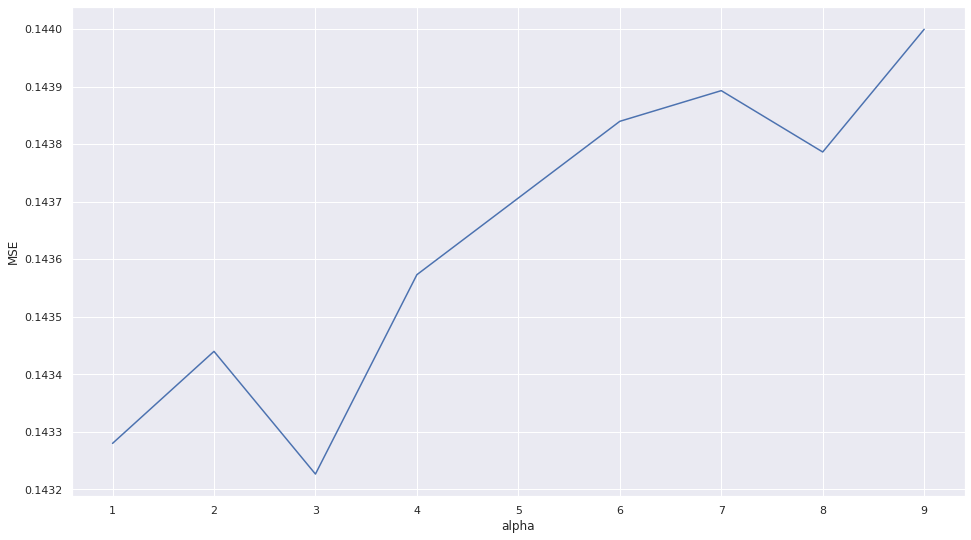

In [36]:
MSE = [1 - x for x in alpha_scores] 

optimal_alpha = alpha_range[MSE.index(min(MSE))]

plt.plot(alpha_range, MSE)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [37]:
print("Optimal alpha: ", optimal_alpha)

Optimal alpha:  3


In [38]:
clf = MultinomialNB(alpha=optimal_alpha)

In [39]:
pipe_nb = Pipeline([('vec', tf_idf_vect_nb), ('clf', clf)])
pipe_nb.fit(X_train['review_preproc'].values, y_train)

Pipeline(steps=[('vec', TfidfVectorizer(max_features=10000)),
                ('clf', MultinomialNB(alpha=3))])

### Evaluate Naive Bayes

In [40]:
start_time = time.time()

y_pred_eval_nb = pipe_nb.predict(X_eval['review_preproc'].values)

end = time.time()
tm = end - start_time

time_per_sample_nb = tm/len(X_eval)*1000
print("Time per sample: ", time_per_sample_nb, " ms.")

Time per sample:  0.08352744579315186  ms.


In [41]:
cm_nb = confusion_matrix(y_eval, y_pred_eval_nb)
cm_nb

# [[TN, FP],
#  [FN, TP]]

array([[4275,  718],
       [ 766, 4241]])

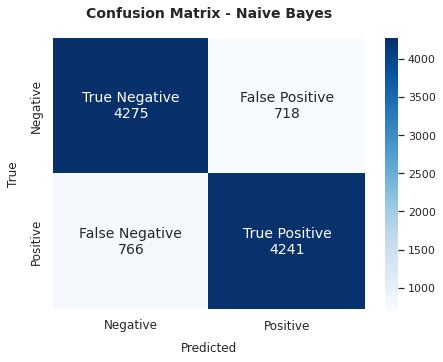

In [42]:
group_names =  ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm_nb.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.heatmap(cm_nb, annot=labels, fmt='', cmap='Blues', annot_kws={"size": CM_FONT_SIZE+2})

ax.set_title("Confusion Matrix - Naive Bayes", fontsize=CM_FONT_SIZE+2, pad=20).set_weight('bold')

ax.set_xlabel("Predicted", fontsize=CM_FONT_SIZE, labelpad=10)
ax.xaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

ax.set_ylabel("True", fontsize=CM_FONT_SIZE, labelpad=10)
ax.yaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

plt.savefig(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_cm_nb.png')
plt.show()

In [43]:
naive_bayes_report = classification_report(y_eval, y_pred_eval_nb, output_dict=True)

In [44]:
naive_bayes_report

{'0': {'precision': 0.8480460226145606,
  'recall': 0.8561986781494092,
  'f1-score': 0.8521028503089496,
  'support': 4993},
 '1': {'precision': 0.8552127445049406,
  'recall': 0.8470141801477931,
  'f1-score': 0.8510937186433876,
  'support': 5007},
 'accuracy': 0.8516,
 'macro avg': {'precision': 0.8516293835597506,
  'recall': 0.8516064291486012,
  'f1-score': 0.8515982844761686,
  'support': 10000},
 'weighted avg': {'precision': 0.8516344002650738,
  'recall': 0.8516,
  'f1-score': 0.8515975780840028,
  'support': 10000}}

In [45]:
print(classification_report(y_eval, y_pred_eval_nb))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4993
           1       0.86      0.85      0.85      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Explain Naive Bayes

In [46]:
explainer_nb = LimeTextExplainer(class_names=CLASS_NAMES)

exp_nb_neg = explainer_nb.explain_instance(data['review_preproc'][LIME_NEG_REVIEW], pipe_nb.predict_proba, num_features=10)
exp_nb_pos = explainer_nb.explain_instance(data['review_preproc'][LIME_POS_REVIEW], pipe_nb.predict_proba, num_features=10)

In [47]:
# print("True rating", data['label'][5], "\n")
# exp_nb_neg.show_in_notebook(text=True)

In [48]:
# print("True rating", data['label'][12508], "\n")
# exp_nb_pos.show_in_notebook(text=True)

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
tf_idf_vect_rf = TfidfVectorizer(
    max_features=10000 # the 10000 most common words    
    )

rf = RandomForestClassifier(random_state=2, n_estimators=100)
pipe_rf = Pipeline([('vec', tf_idf_vect_rf), ('rf', rf)])
pipe_rf.fit(X_train['review_preproc'].values, y_train)

Pipeline(steps=[('vec', TfidfVectorizer(max_features=10000)),
                ('rf', RandomForestClassifier(random_state=2))])

### Evaluate Random Forest

In [51]:
start_time = time.time()

y_pred_eval_rf = pipe_rf.predict(X_eval['review_preproc'].values)

end = time.time()
tm = end - start_time

time_per_sample_rf = tm/len(X_eval)*1000
print("Time per sample: ", time_per_sample_rf, " ms.")

Time per sample:  0.1271735668182373  ms.


In [52]:
cm_rf = confusion_matrix(y_eval, y_pred_eval_rf)
cm_rf

array([[4297,  696],
       [ 879, 4128]])

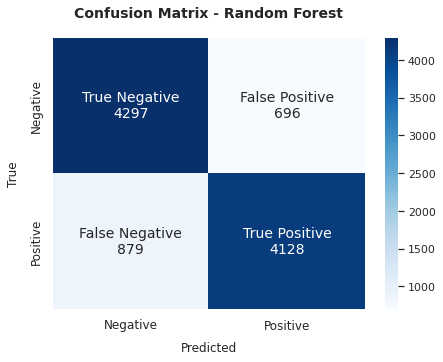

In [53]:
group_names =  ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm_rf.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.heatmap(cm_rf, annot=labels, fmt='', cmap='Blues', annot_kws={"size": CM_FONT_SIZE+2})

ax.set_title("Confusion Matrix - Random Forest", fontsize=CM_FONT_SIZE+2, pad=20).set_weight('bold')

ax.set_xlabel("Predicted", fontsize=CM_FONT_SIZE, labelpad=10)
ax.xaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

ax.set_ylabel("True", fontsize=CM_FONT_SIZE, labelpad=10)
ax.yaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

plt.savefig(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_cm_rf.png')
plt.show()

In [54]:
random_forest_report = classification_report(y_eval, y_pred_eval_rf, output_dict=True)

In [55]:
random_forest_report

{'0': {'precision': 0.830177743431221,
  'recall': 0.8606048467854996,
  'f1-score': 0.8451175140131774,
  'support': 4993},
 '1': {'precision': 0.8557213930348259,
  'recall': 0.8244457759137208,
  'f1-score': 0.839792493133964,
  'support': 5007},
 'accuracy': 0.8425,
 'macro avg': {'precision': 0.8429495682330235,
  'recall': 0.8425253113496103,
  'f1-score': 0.8424550035735707,
  'support': 10000},
 'weighted avg': {'precision': 0.8429674487877459,
  'recall': 0.8425,
  'f1-score': 0.8424512760589552,
  'support': 10000}}

In [56]:
print(classification_report(y_eval, y_pred_eval_rf))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      4993
           1       0.86      0.82      0.84      5007

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Explain Random Forest

In [57]:
# input_text_rf = tf_idf_vect_rf.transform([data['review_preproc'][5]])

In [58]:
# prediction_rf = rf.predict(input_text_rf)

In [59]:
# prediction_rf

In [60]:
explainer_rf = LimeTextExplainer(class_names=CLASS_NAMES)

exp_rf_neg = explainer_rf.explain_instance(data['review_preproc'][LIME_NEG_REVIEW], pipe_rf.predict_proba, num_features=10)
exp_rf_pos = explainer_rf.explain_instance(data['review_preproc'][LIME_POS_REVIEW], pipe_rf.predict_proba, num_features=10)

In [61]:
# print("True rating", data['label'][5], "\n")
# exp_rf_neg.show_in_notebook(text=True)

In [62]:
# print("True rating", data['label'][12508], "\n")
# exp_rf_pos.show_in_notebook(text=True)

#  Long Short-Term Memory (LSTM)

In [63]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout, SpatialDropout1D

In [64]:
top_words = 10000
max_review_length = 256
embedding_vecor_length = 32

tokenizer_lstm = Tokenizer(num_words=top_words)
# prepare data for training
tokenizer_lstm.fit_on_texts(X_train['review_preproc'])
list_tokenized_train = tokenizer_lstm.texts_to_sequences(X_train['review_preproc'])
X_train_lstm = pad_sequences(list_tokenized_train, maxlen=max_review_length)
# prepare data for evaluation
x_eval_tok = tokenizer_lstm.texts_to_sequences(X_eval['review_preproc'])
x_eval_tok_pad = pad_sequences(x_eval_tok, maxlen=max_review_length)

In [65]:
model_lstm = load_model('./lstm_model/2023-04-18_19-08-10_model_lstm_08.h5')

### Evaluate LSTM

In [66]:
start_time = time.time()

y_pred_eval_lstm_float = model_lstm.predict(x_eval_tok_pad)

end = time.time()
tm = end - start_time

time_per_sample_lstm = tm/len(X_eval)*1000
print("Time per sample: ", time_per_sample_lstm, " ms.")

Time per sample:  1.6553798913955688  ms.


In [67]:
# y_pred_eval_lstm = (y_pred_eval_lstm > 0.5).astype(np.float32)
y_pred_eval_lstm = (y_pred_eval_lstm_float > 0.5).astype(np.int32).ravel()

In [68]:
cm_lstm = confusion_matrix(y_eval, y_pred_eval_lstm)
cm_lstm

array([[4392,  601],
       [ 632, 4375]])

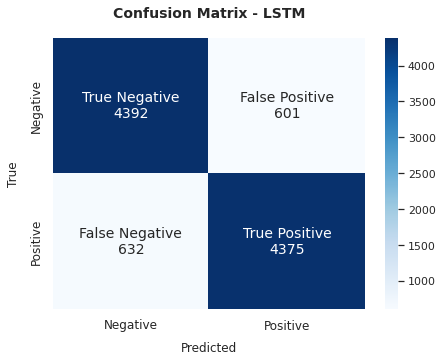

In [69]:
group_names =  ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm_lstm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.heatmap(cm_lstm, annot=labels, fmt='', cmap='Blues', annot_kws={"size": CM_FONT_SIZE+2})

ax.set_title("Confusion Matrix - LSTM", fontsize=CM_FONT_SIZE+2, pad=20).set_weight('bold')

ax.set_xlabel("Predicted", fontsize=CM_FONT_SIZE, labelpad=10)
ax.xaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

ax.set_ylabel("True", fontsize=CM_FONT_SIZE, labelpad=10)
ax.yaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

plt.savefig(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_cm_lstm.png')
plt.show()

In [70]:
lstm_report = classification_report(y_eval, y_pred_eval_lstm, output_dict=True)

In [71]:
lstm_report

{'0': {'precision': 0.8742038216560509,
  'recall': 0.8796314840777087,
  'f1-score': 0.8769092542677448,
  'support': 4993},
 '1': {'precision': 0.8792202572347267,
  'recall': 0.8737767126023567,
  'f1-score': 0.8764900330561955,
  'support': 5007},
 'accuracy': 0.8767,
 'macro avg': {'precision': 0.8767120394453889,
  'recall': 0.8767040983400327,
  'f1-score': 0.8766996436619702,
  'support': 10000},
 'weighted avg': {'precision': 0.876715550950294,
  'recall': 0.8767,
  'f1-score': 0.876699350207122,
  'support': 10000}}

In [72]:
print(classification_report(y_eval, y_pred_eval_lstm))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4993
           1       0.88      0.87      0.88      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Explain LSTM

In [73]:
def predict_proba(arr):
    processed = []
    for i in arr:
        processed.append(i)

    list_tokenized_ex = tokenizer_lstm.texts_to_sequences(processed)
    Ex = pad_sequences(list_tokenized_ex, maxlen=max_review_length)
    pred = model_lstm.predict(Ex)
    returnable = []
    for i in pred:
        temp = i[0]
        returnable.append(np.array([1-temp, temp]))
    return np.array(returnable)

In [74]:
explainer_lstm = LimeTextExplainer(class_names=CLASS_NAMES)

exp_lstm_neg = explainer_lstm.explain_instance(data['review_preproc'][LIME_NEG_REVIEW], predict_proba)
exp_lstm_pos = explainer_lstm.explain_instance(data['review_preproc'][LIME_POS_REVIEW], predict_proba)

In [75]:
# print("True rating", data['label'][LIME_NEG_REVIEW], "\n")
# exp_lstm_neg.show_in_notebook(text=True)

In [76]:
# print("True rating", data['label'][LIME_POS_REVIEW], "\n")
# exp_lstm_pos.show_in_notebook(text=True)

# Transformers_general  - "off the shelf"
### General tuned: sst-2-english, HuggingFace

In [77]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [78]:
# Load the model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer_tr_gen = AutoTokenizer.from_pretrained(model_name)
model_tr_gen = AutoModelForSequenceClassification.from_pretrained(model_name)

In [79]:
# Predict function
def predict_fn_gen(texts):
    inputs = tokenizer_tr_gen(texts, padding=True, 
                           truncation=True, return_tensors="pt")
    outputs = model_tr_gen(**inputs)
    predictions = torch.softmax(outputs.logits, dim=1).detach().numpy()
    return predictions

## Evaluate Transformer_general - "off the shelf"

In [80]:
# import time
# start_time = time.time()

# softmax_predictions_tr_gen = predict_fn_gen(list(X_eval['text'].values))
# y_pred_eval_tr_gen = np.argmax(softmax_predictions_tr1, axis=1)

# end = time.time()
# tm = end - start_time

# time_per_sample_transformer_gen = tm/len(X_eval)*1000
# print("Time per sample: ", time_per_sample_transformer_gen, " ms.")

In [81]:
y_pred_eval_tr_gen = []

import time
start_time = time.time()

for chunk in np.array_split(X_eval, 1000):

    softmax_predictions_tr_gen_chunk = predict_fn_gen(list(chunk['text'].values))
    predictions_tr_gen_chunk = np.argmax(softmax_predictions_tr_gen_chunk, axis=1)
    y_pred_eval_tr_gen.extend(predictions_tr_gen_chunk)

end = time.time()
tm = end - start_time

time_per_sample_transformer_gen = tm/len(X_eval)*1000
print("Time per sample: ", time_per_sample_transformer_gen, " ms.")

Time per sample:  97.4926383972168  ms.


In [82]:
cm_tr_gen = confusion_matrix(y_eval, y_pred_eval_tr_gen)  # confusion_matrix(y_true, y_pred)
cm_tr_gen

array([[4609,  384],
       [ 692, 4315]])

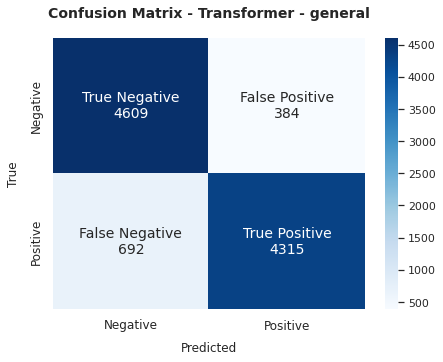

In [83]:
group_names =  ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm_tr_gen.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.heatmap(cm_tr_gen, annot=labels, fmt='', cmap='Blues', annot_kws={"size": CM_FONT_SIZE+2})

ax.set_title("Confusion Matrix - Transformer - general", fontsize=CM_FONT_SIZE+2, pad=20).set_weight('bold')

ax.set_xlabel("Predicted", fontsize=CM_FONT_SIZE, labelpad=10)
ax.xaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

ax.set_ylabel("True", fontsize=CM_FONT_SIZE, labelpad=10)
ax.yaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

plt.savefig(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_cm_tr1.png')
plt.show()

In [84]:
transformer_gen_report = classification_report(y_eval, y_pred_eval_tr_gen, output_dict=True)

In [85]:
transformer_gen_report

{'0': {'precision': 0.869458592718355,
  'recall': 0.9230923292609654,
  'f1-score': 0.8954730911210415,
  'support': 4993},
 '1': {'precision': 0.918280485209619,
  'recall': 0.8617934891152387,
  'f1-score': 0.8891407376880279,
  'support': 5007},
 'accuracy': 0.8924,
 'macro avg': {'precision': 0.893869538963987,
  'recall': 0.8924429091881021,
  'f1-score': 0.8923069144045347,
  'support': 10000},
 'weighted avg': {'precision': 0.8939037142887309,
  'recall': 0.8924,
  'f1-score': 0.8923024817571317,
  'support': 10000}}

In [86]:
print(classification_report(y_eval, y_pred_eval_tr_gen))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4993
           1       0.92      0.86      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Explain Transformer_1 - "off the shelf"

In [87]:
explainer_tr_gen = LimeTextExplainer(class_names=CLASS_NAMES)

exp_tr_gen_neg = explainer_tr_gen.explain_instance(data['text'][LIME_NEG_REVIEW], predict_fn_gen, num_samples=10)
exp_tr_gen_pos = explainer_tr_gen.explain_instance(data['text'][LIME_POS_REVIEW], predict_fn_gen, num_samples=10)

In [88]:
# print("True rating", data['label'][LIME_NEG_REVIEW],"\n")
# exp_tr_gen_neg.show_in_notebook(text=True)

In [89]:
# print("True rating", data['label'][LIME_POS_REVIEW],"\n")
# exp_tr_gen_pos.show_in_notebook(text=True)

In [90]:
# The top 10 contributing words for the positive prediction
print("Top contributing words for the positive prediction:")
print(exp_tr_gen_neg.as_list(label=1))

Top contributing words for the positive prediction:
[('ones', -0.02486253062636029), ('my', 0.009352389500392867), ('films', 0.008590095565765858), ('people', -0.00399674736808151), ('night', 0.001832098837182669), ('scenes', 0.0017041040138505562), ('angle', 0.0017041040138505562), ('controversial', 0.001704104013850556), ('you', -0.00019055325514821594), ('sophomore', -0.00019055325514821578)]


## Transformer fine tuned on IMDB Data Set

In [91]:
from transformers import TFDistilBertForSequenceClassification
import tensorflow as tf

In [92]:
from transformers import DistilBertTokenizerFast
tokenizer_tr_tuned = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [93]:
model_tr_tuned = TFDistilBertForSequenceClassification.from_pretrained("./distilbert_fine_tuned_6")

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at ./distilbert_fine_tuned_6.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


### Evaluate Transformer fine tuned

In [94]:
def predict_fn_tuned(texts):
    inputs = tokenizer_tr_tuned(texts, padding=True, truncation=True, return_tensors='tf')
#     print(inputs)
    outputs = model_tr_tuned(**inputs)
    predictions = tf.nn.softmax(outputs.logits).numpy()
    predictions_labels = tf.math.argmax(predictions, axis=1).numpy()
    return predictions

In [95]:
# start_time = time.time()

# softmax_predictions_tr_tuned = predict_fn_tuned(list(X_eval['text'].values))
# y_pred_eval_tr_tuned = np.argmax(softmax_predictions_tr_tuned, axis=1)

# end = time.time()
# tm = end - start_time

# time_per_sample_transformer_tuned = tm/len(X_eval)*1000
# print("Time per sample: ", time_per_sample_transformer_tuned, " ms.")

In [96]:
y_pred_eval_tr_tuned = []

import time
start_time = time.time()

for chunk in np.array_split(X_eval, 1000):
    softmax_predictions_tr_tuned_chunk = predict_fn_tuned(list(chunk['text'].values))
    predictions_tr_tuned_chunk = np.argmax(softmax_predictions_tr_tuned_chunk, axis=1)
    y_pred_eval_tr_tuned.extend(predictions_tr_tuned_chunk)

end = time.time()
tm = end - start_time

time_per_sample_transformer_tuned = tm/len(X_eval)*1000
print("Time per sample: ", time_per_sample_transformer_tuned, " ms.")

Time per sample:  174.138134598732  ms.


In [97]:
cm_tr_tuned = confusion_matrix(y_eval, y_pred_eval_tr_tuned)
cm_tr_tuned

array([[4628,  365],
       [ 275, 4732]])

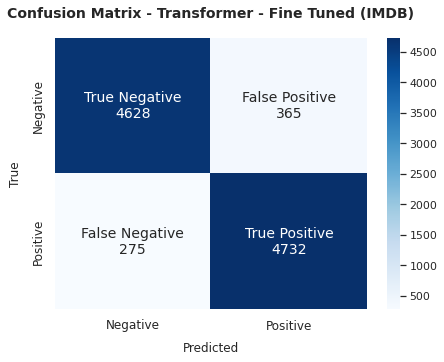

In [98]:
group_names =  ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm_tr_tuned.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.heatmap(cm_tr_tuned, annot=labels, fmt='', cmap='Blues', annot_kws={"size": CM_FONT_SIZE+2})

ax.set_title("Confusion Matrix - Transformer - Fine Tuned (IMDB)", fontsize=CM_FONT_SIZE+2, pad=20).set_weight('bold')

ax.set_xlabel("Predicted", fontsize=CM_FONT_SIZE, labelpad=10)
ax.xaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

ax.set_ylabel("True", fontsize=CM_FONT_SIZE, labelpad=10)
ax.yaxis.set_ticklabels(['Negative', 'Positive'], fontsize=CM_FONT_SIZE)

plt.savefig(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_cm_tr_tuned.png')
plt.show()

In [99]:
transformer_tuned_report = classification_report(y_eval, y_pred_eval_tr_tuned, output_dict=True)

In [100]:
transformer_tuned_report

{'0': {'precision': 0.943911890679176,
  'recall': 0.9268976567194072,
  'f1-score': 0.935327405012126,
  'support': 4993},
 '1': {'precision': 0.9283892485775946,
  'recall': 0.945076892350709,
  'f1-score': 0.9366587490102929,
  'support': 5007},
 'accuracy': 0.936,
 'macro avg': {'precision': 0.9361505696283854,
  'recall': 0.9359872745350581,
  'f1-score': 0.9359930770112095,
  'support': 10000},
 'weighted avg': {'precision': 0.9361397037789142,
  'recall': 0.936,
  'f1-score': 0.9359940089520081,
  'support': 10000}}

In [101]:
print(classification_report(y_eval, y_pred_eval_tr_tuned))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4993
           1       0.93      0.95      0.94      5007

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



### Explain Transformer fine tuned

In [102]:
explainer_tr_tuned = LimeTextExplainer(class_names=CLASS_NAMES)

exp_tr_tuned_neg = explainer_tr_tuned.explain_instance(data['text'][LIME_NEG_REVIEW], predict_fn_tuned, num_samples=10)
exp_tr_tuned_pos = explainer_tr_tuned.explain_instance(data['text'][LIME_POS_REVIEW], predict_fn_tuned, num_samples=10)

In [103]:
# print("True rating", data['label'][LIME_NEG_REVIEW],"\n")
# exp_tr_tuned_neg.show_in_notebook(text=True)

In [104]:
# print("True rating", data['label'][LIME_POS_REVIEW],"\n")
# exp_tr_tuned_pos.show_in_notebook(text=True)

## Final Repport

In [105]:
dfs = []

df = pd.DataFrame()
for key, value in naive_bayes_report.items():
    if type(value) != dict:
        df.loc[0, key] = value
    else:
        for nested_key, nested_value in value.items():
            column_name = f"{key}_{nested_key}" 
            df.loc[0, column_name] = nested_value
df['time ms'] = time_per_sample_nb
df['model'] = "Naive Bayes"
dfs.append(df)

df = pd.DataFrame()
for key, value in random_forest_report.items():
    if type(value) != dict:
        df.loc[0, key] = value
    else:
        for nested_key, nested_value in value.items():
            column_name = f"{key}_{nested_key}" 
            df.loc[0, column_name] = nested_value
df['time ms']=time_per_sample_rf
df['model']="Random Forest"
dfs.append(df)


df = pd.DataFrame()
for key, value in lstm_report.items():
    if type(value) != dict:
        df.loc[0, key] = value
    else:
        for nested_key, nested_value in value.items():
            column_name = f"{key}_{nested_key}" 
            df.loc[0, column_name] = nested_value
df['time ms'] = time_per_sample_lstm
df['model'] = "LSTM"
dfs.append(df)

df = pd.DataFrame()
for key, value in transformer_gen_report.items():
    if type(value) != dict:
        df.loc[0, key] = value
    else:
        for nested_key, nested_value in value.items():
            column_name = f"{key}_{nested_key}" 
            df.loc[0, column_name]=nested_value
df['time ms'] = time_per_sample_transformer_gen
df['model'] = "Transformer general"
dfs.append(df)


df = pd.DataFrame()
for key, value in transformer_tuned_report.items():
    if type(value) != dict:
        df.loc[0, key] = value
    else:
        for nested_key, nested_value in value.items():
            column_name = f"{key}_{nested_key}" 
            df.loc[0, column_name]=nested_value
df['time ms'] = time_per_sample_transformer_tuned
df['model'] = "Transformer tuned"
dfs.append(df)

final_report = pd.concat(dfs, ignore_index=True)

In [106]:
final_report

,0_precision,0_recall,0_f1-score,0_support,1_precision,1_recall,1_f1-score,1_support,accuracy,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,time ms,model
0,0.848046,0.856199,0.852103,4993.0,0.855213,0.847014,0.851094,5007.0,0.8516,0.851629,0.851606,0.851598,10000.0,0.851634,0.8516,0.851598,10000.0,0.083527,Naive Bayes
1,0.830178,0.860605,0.845118,4993.0,0.855721,0.824446,0.839792,5007.0,0.8425,0.842950,0.842525,0.842455,10000.0,0.842967,0.8425,0.842451,10000.0,0.127174,Random Forest
2,0.874204,0.879631,0.876909,4993.0,0.879220,0.873777,0.876490,5007.0,0.8767,0.876712,0.876704,0.876700,10000.0,0.876716,0.8767,0.876699,10000.0,1.655380,LSTM
3,0.869459,0.923092,0.895473,4993.0,0.918280,0.861793,0.889141,5007.0,0.8924,0.893870,0.892443,0.892307,10000.0,0.893904,0.8924,0.892302,10000.0,97.492638,Transformer general
4,0.943912,0.926898,0.935327,4993.0,0.928389,0.945077,0.936659,5007.0,0.9360,0.936151,0.935987,0.935993,10000.0,0.936140,0.9360,0.935994,10000.0,174.138135,Transformer tuned


In [107]:
# save final report as csv
final_report.to_csv(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_final_report.csv', index=False)

In [108]:
# final_report=pd.read_csv('./output/_final_report.csv')

In [109]:
# save final report as exel
final_report.to_excel(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_final_report.xlsx', index=False)

In [110]:
final_report = final_report.round(2)

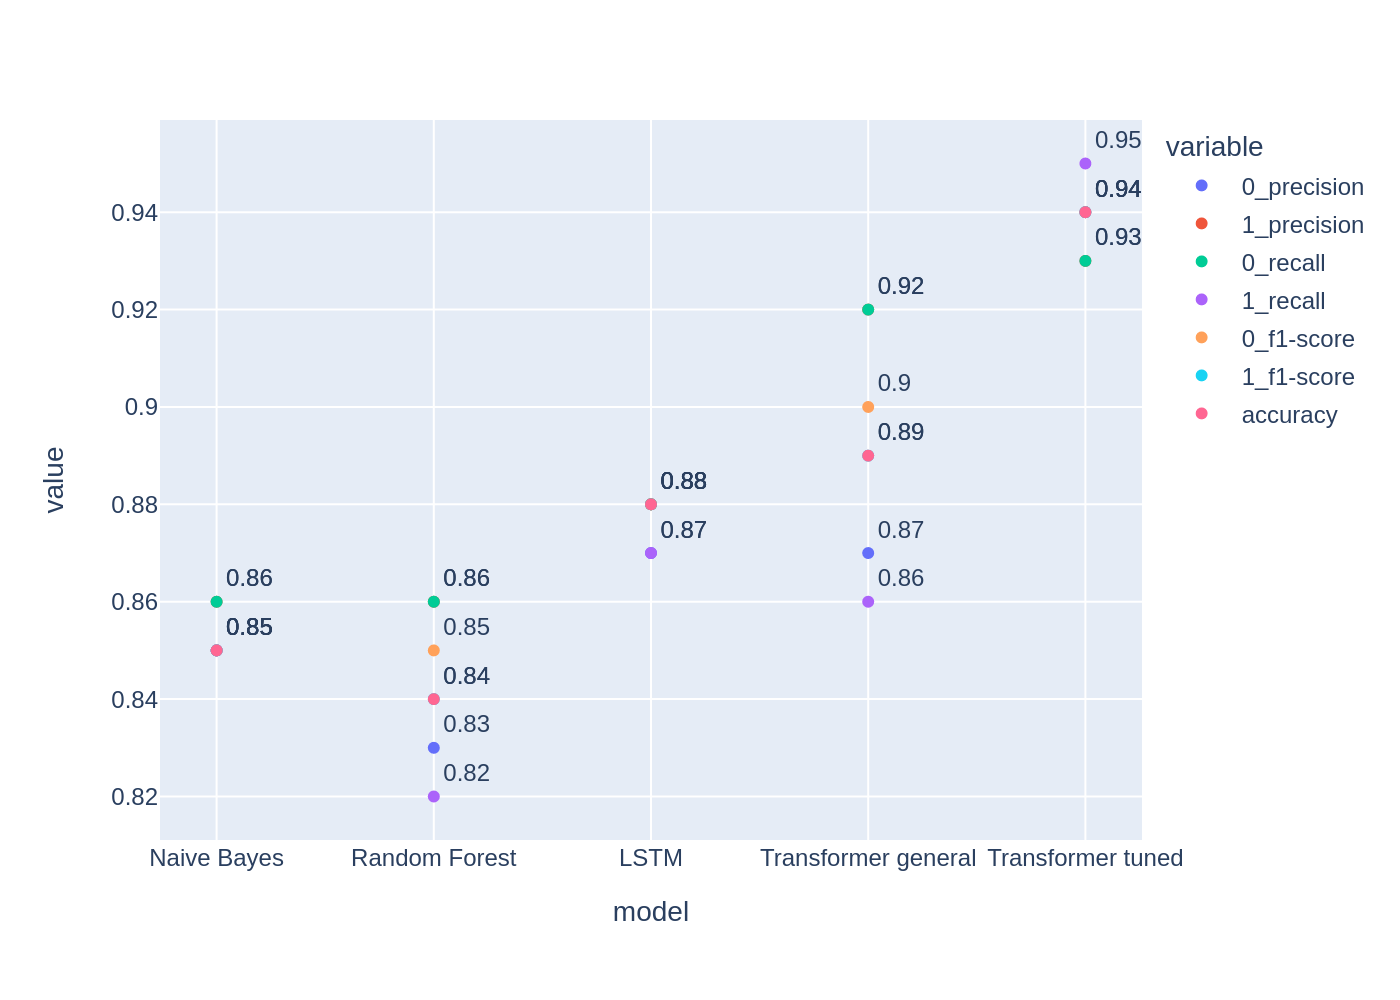

In [111]:
fig = px.scatter(final_report, x="model", y=["0_precision",
                                      "1_precision",
                                      "0_recall",
                                      "1_recall",
                                      "0_f1-score",
                                      "1_f1-score",
                                      "accuracy"
                                      ], text="value").update_traces(textposition="top right")
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_final_all_scat.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

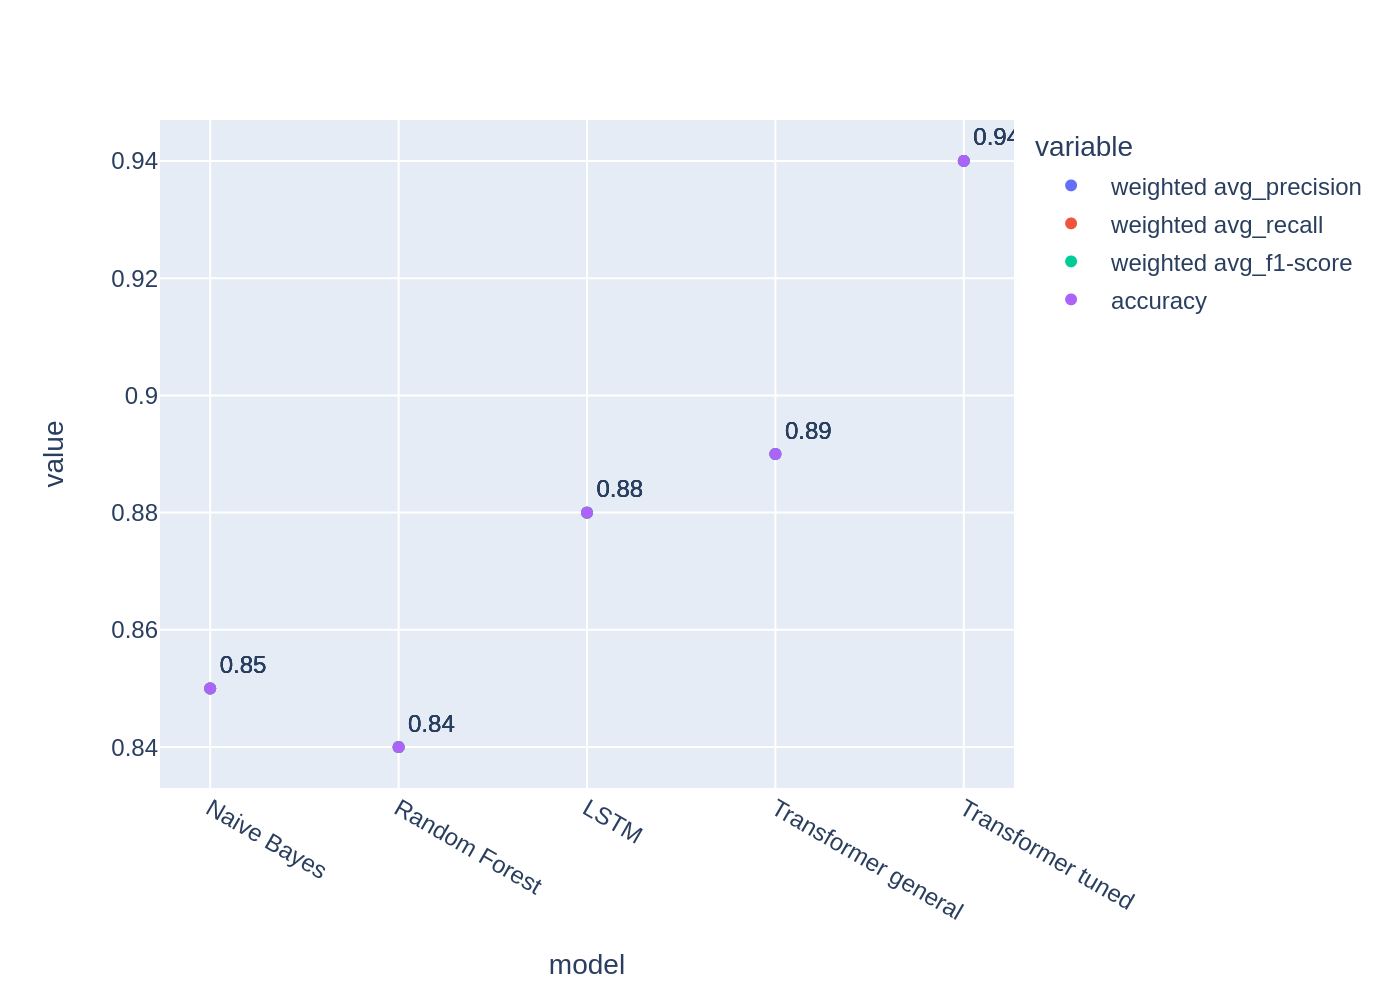

In [112]:
fig = px.scatter(final_report, x="model", y=["weighted avg_precision",
                                      
                                      "weighted avg_recall",
                                     
                                      "weighted avg_f1-score",
                                      
                                      "accuracy"
                                      ], text="value").update_traces(textposition="top right")
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_final_all_avg_scat.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

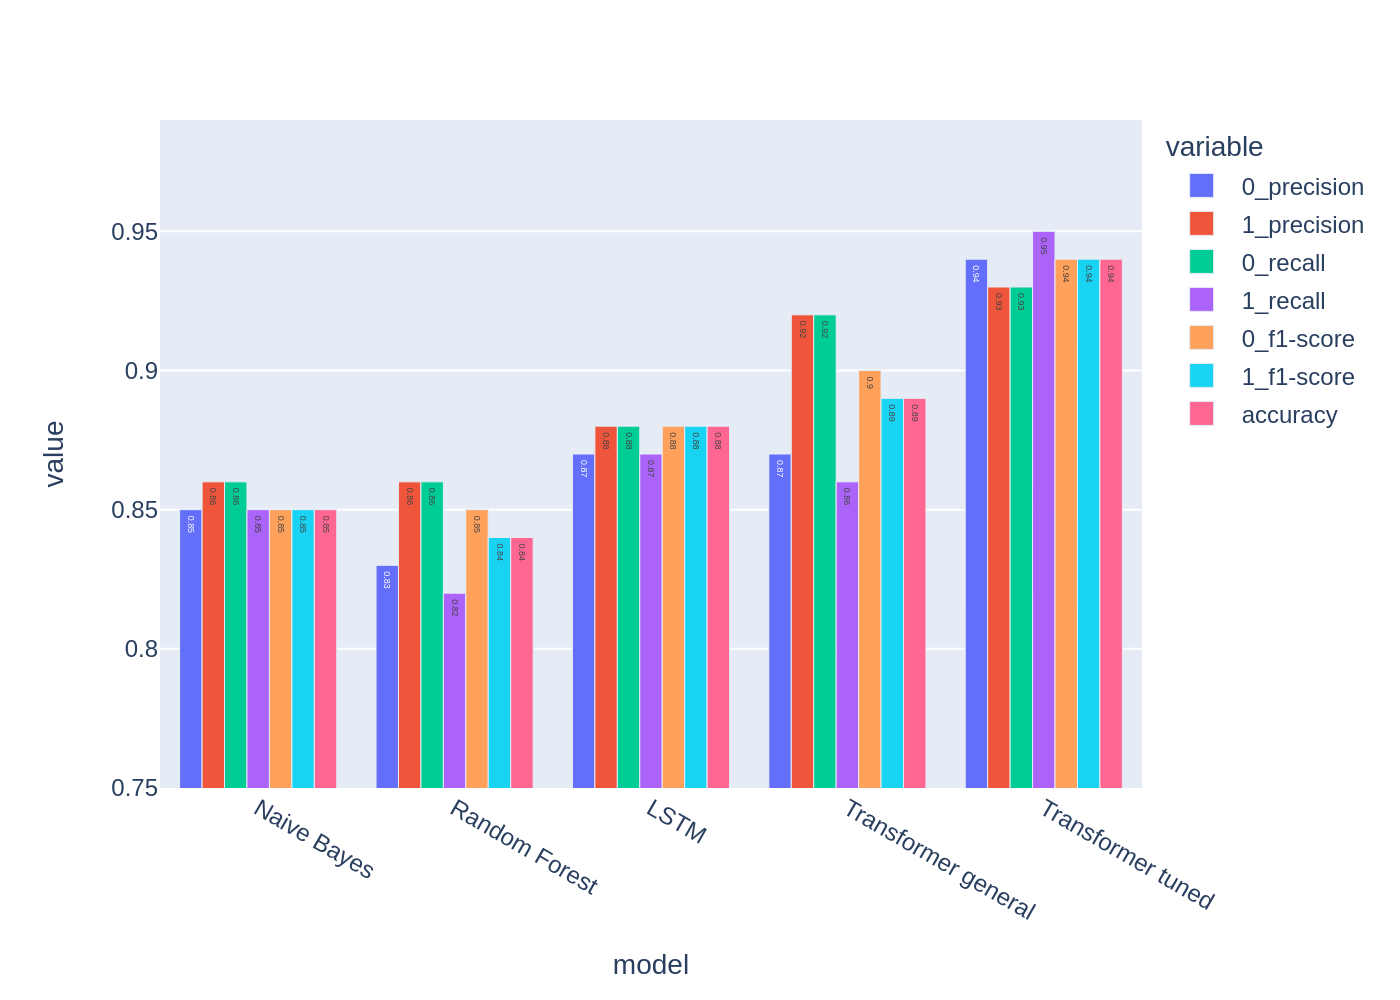

In [113]:
fig = px.bar(final_report, x="model", y=["0_precision",
                                      "1_precision",
                                      "0_recall",
                                      "1_recall",
                                      "0_f1-score",
                                      "1_f1-score",
                                      "accuracy"], 
                                      barmode='group',
                                      text_auto='')
fig.update_yaxes(range=[0.75, 0.99])
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_final_all_bar.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path) 

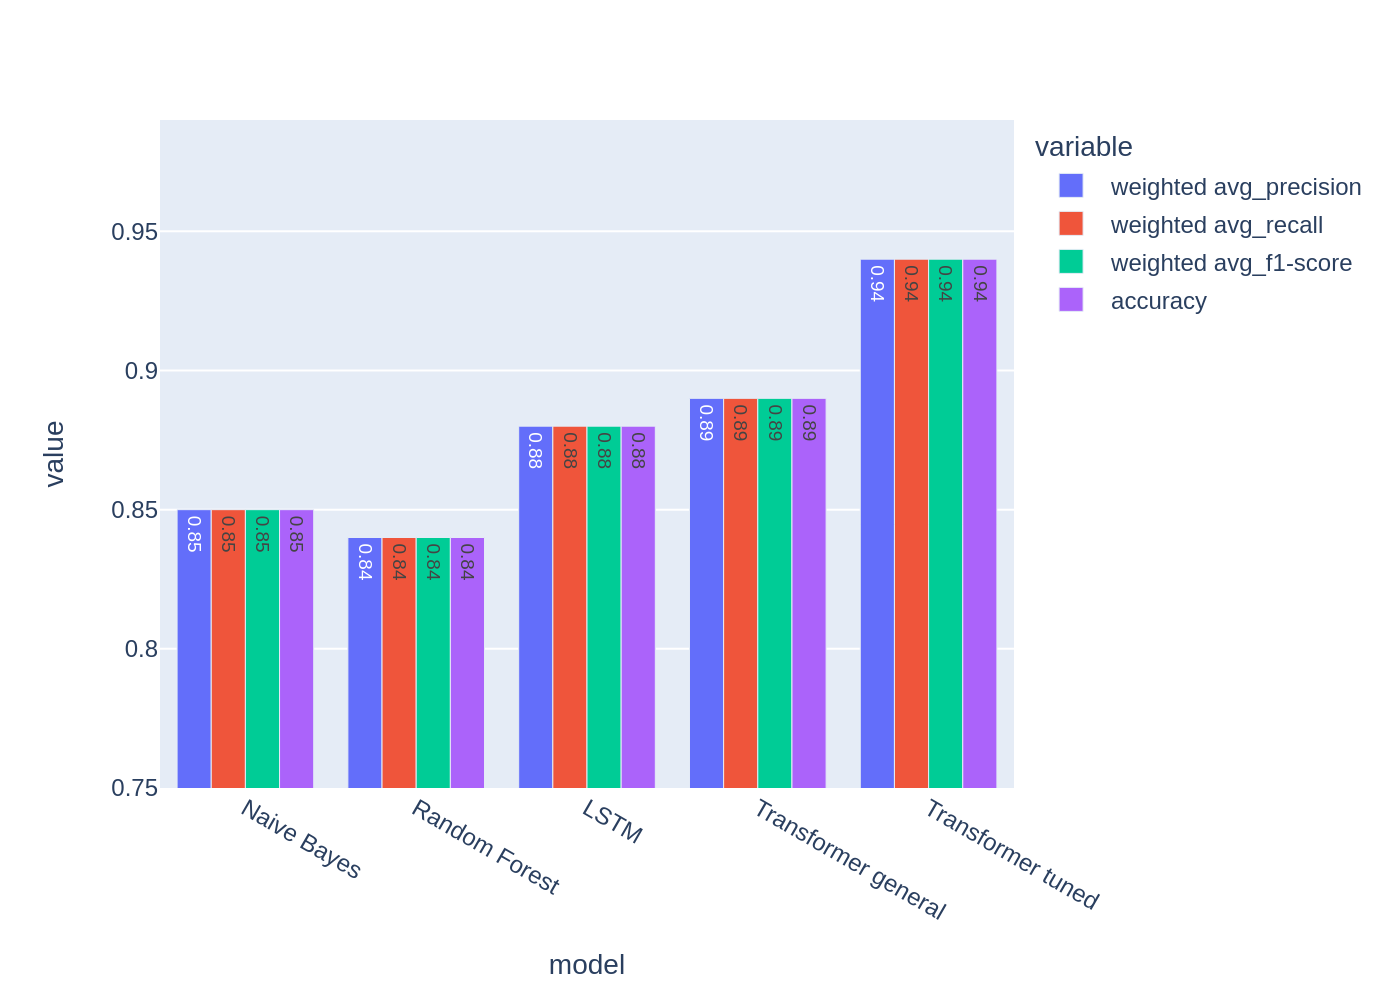

In [114]:
fig = px.bar(final_report, x="model", y=["weighted avg_precision",
                                         "weighted avg_recall",
                                         "weighted avg_f1-score",
                                         "accuracy"], 
                                      barmode='group',
                                      text_auto='')
fig.update_yaxes(range=[0.75, 0.99])
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_final_all_avg_bar.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

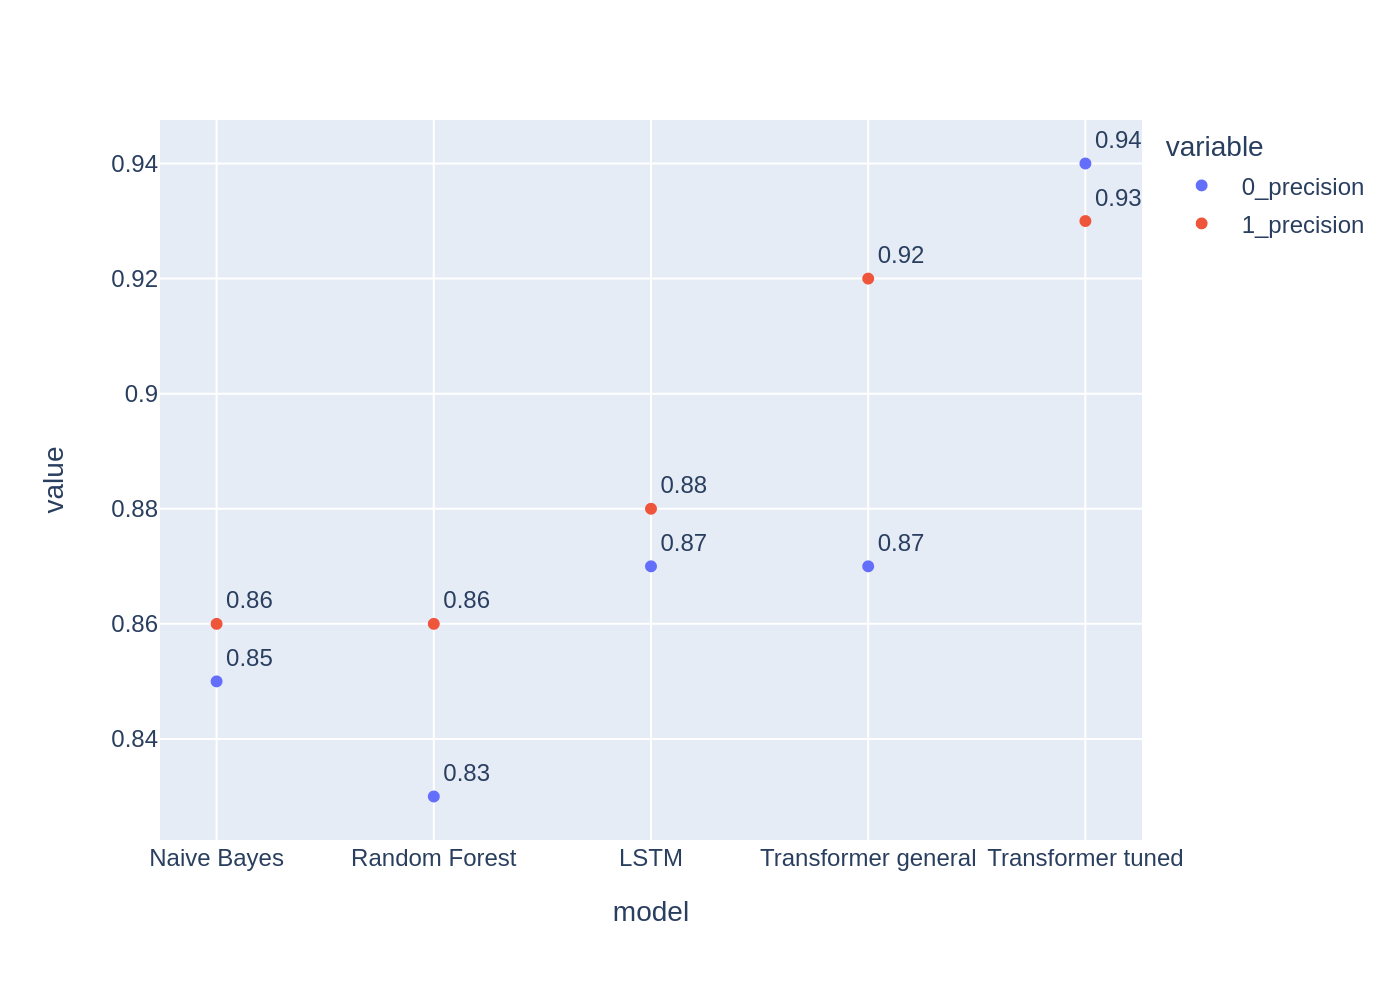

In [115]:
fig = px.scatter(final_report, x="model", y=["0_precision",
                                             "1_precision",
                                            ], text="value").update_traces(textposition="top right")
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_precision.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

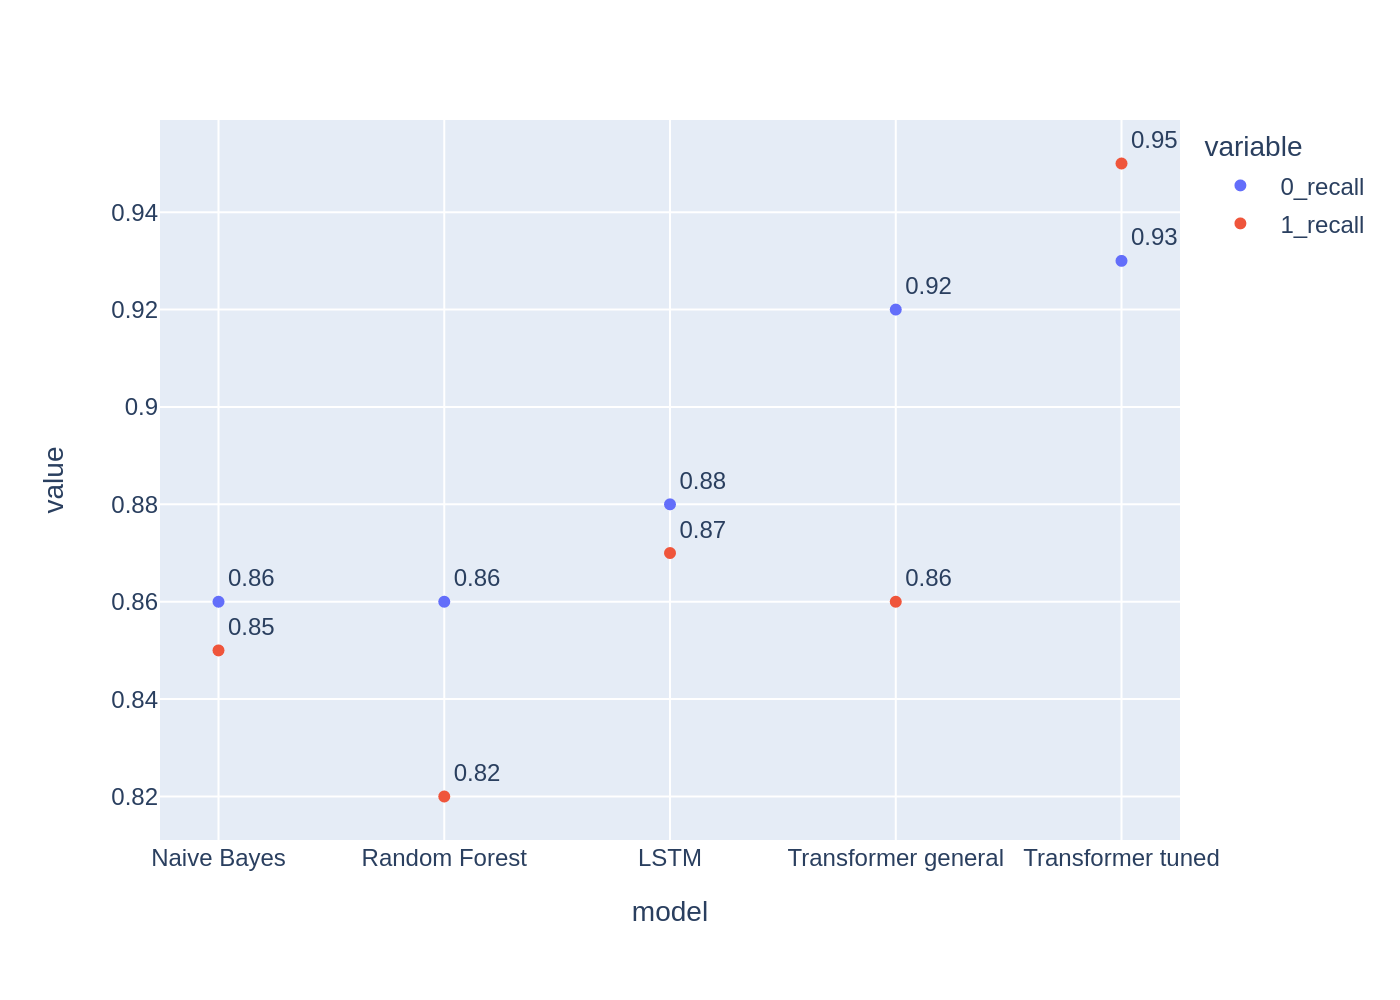

In [116]:
fig = px.scatter(final_report, x="model", y=["0_recall",
                                            "1_recall",
                                            ], text="value").update_traces(textposition="top right")
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_recall.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

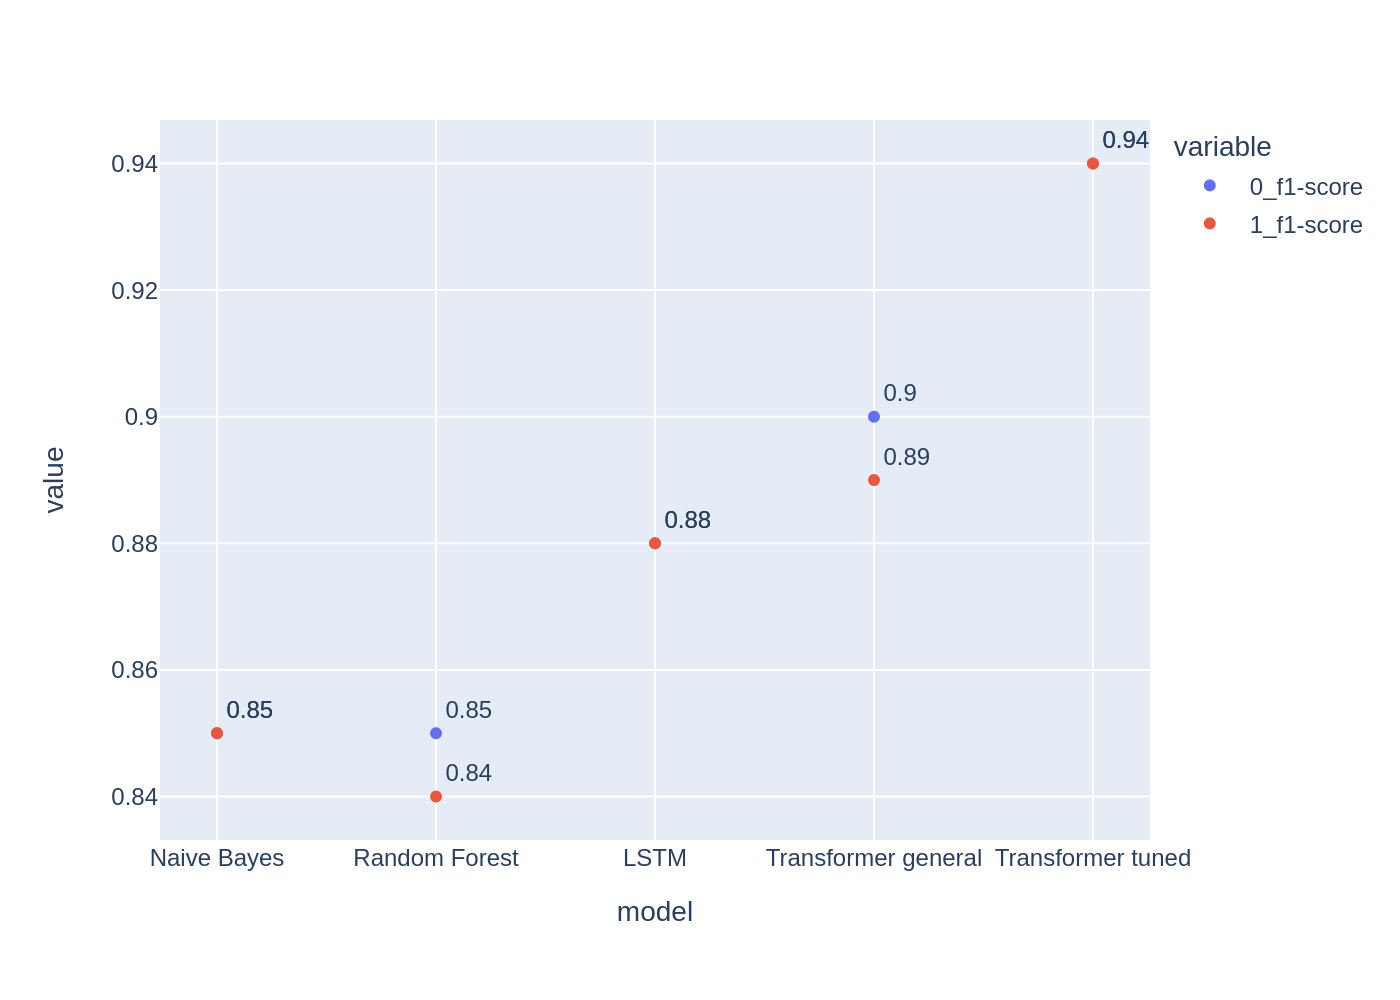

In [117]:
fig = px.scatter(final_report, x="model", y=["0_f1-score",
                                             "1_f1-score"
                                            ], text="value").update_traces(textposition="top right")
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_f1_score.png' 
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

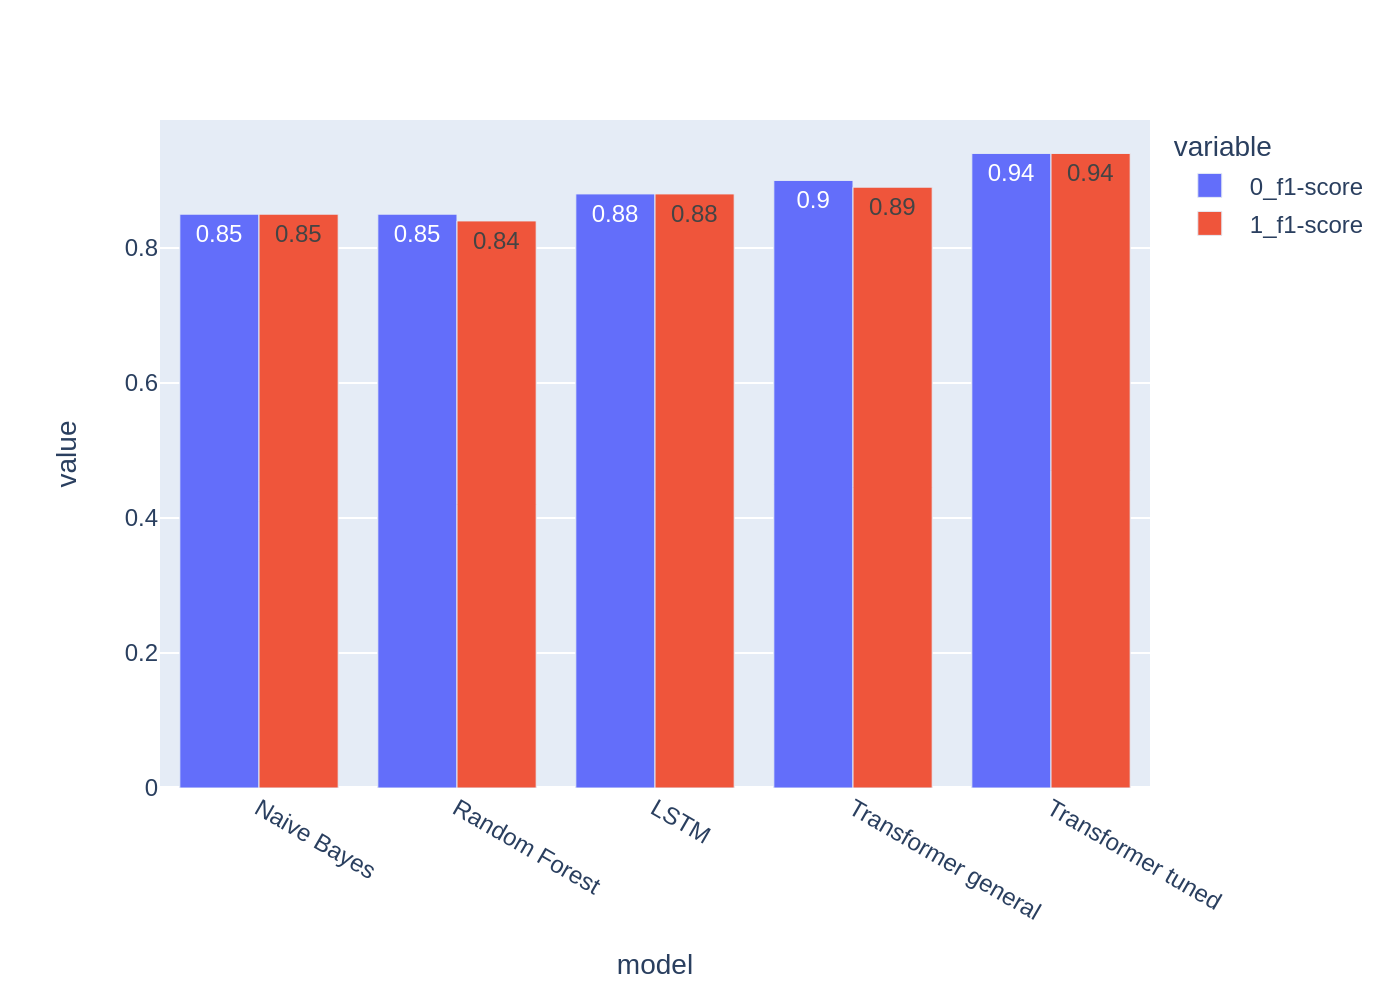

In [118]:
# fig=px.scatter(final_report, x="model", y=["0_f1-score",
fig = px.bar(final_report, x="model", y=["0_f1-score",
                                             "1_f1-score"],
                                              barmode='group',
                                               text_auto=''
                                              )#.update_traces(textposition="top right")
path=f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_f1_score.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

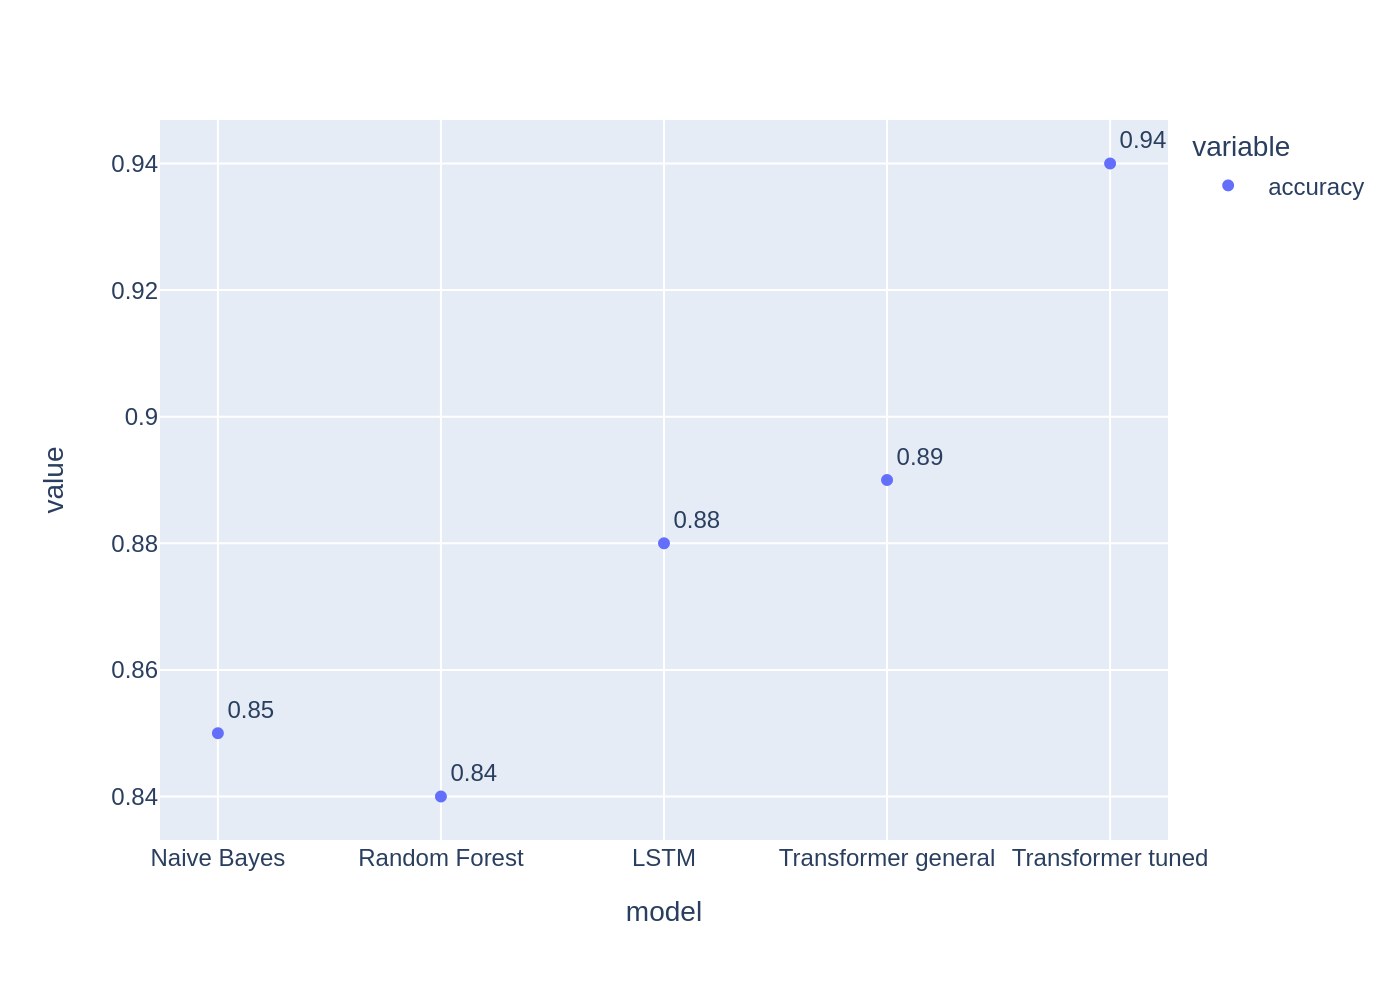

In [119]:
fig = px.scatter(final_report, x="model", y=["accuracy"], text="value").update_traces(textposition="top right")
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_accuracy.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

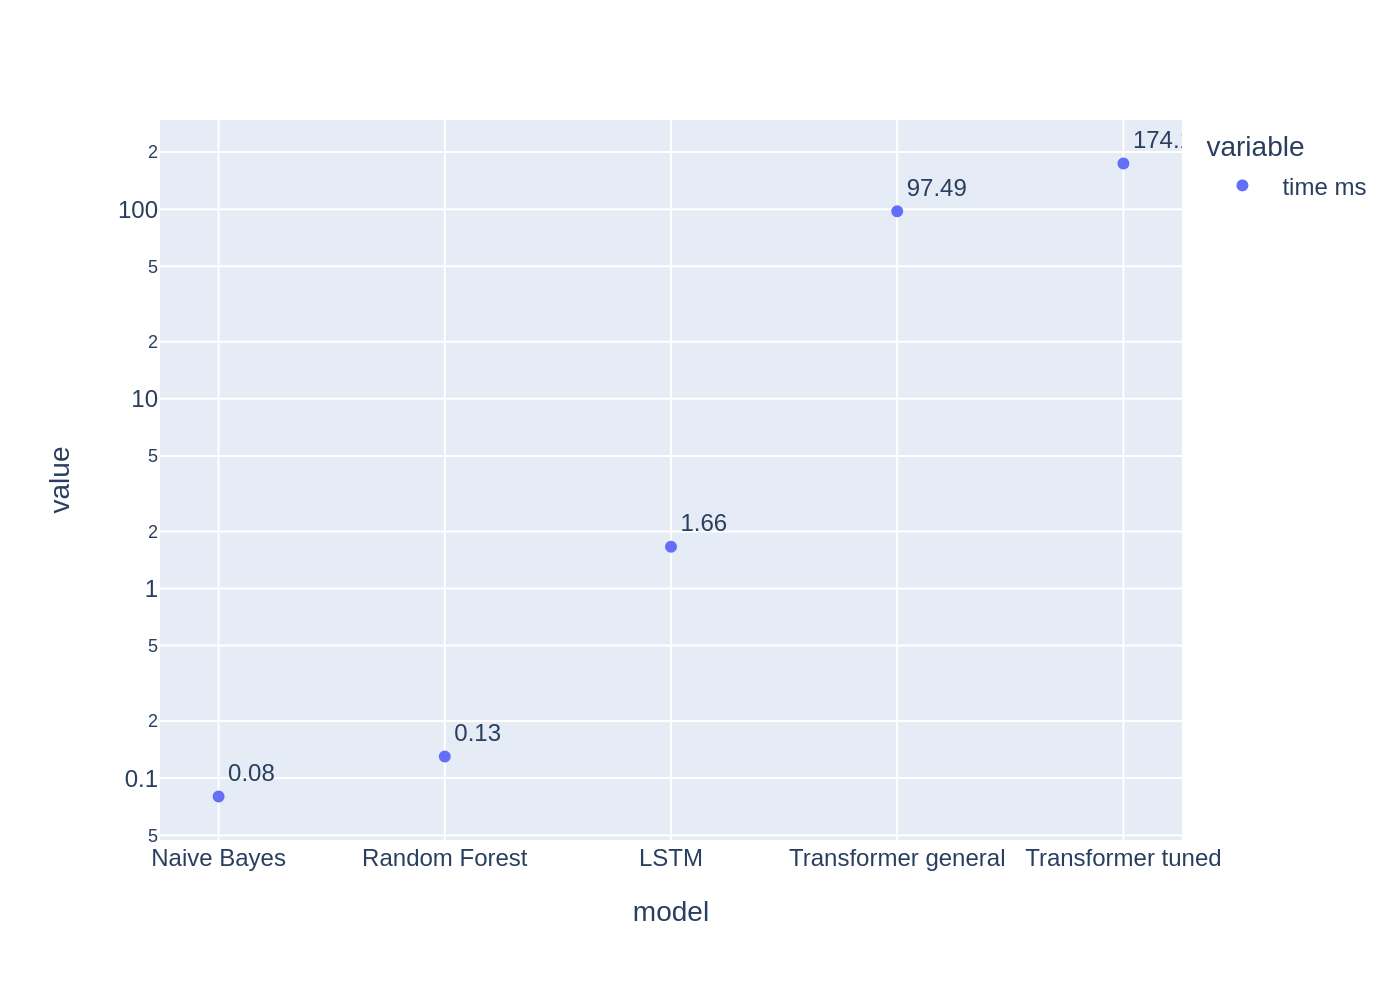

In [120]:
fig = px.scatter(final_report, x="model", y=["time ms"], log_y=True, text="value").update_traces(textposition="top right")
path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_time.png'
fig.write_image(path, scale=2)
# fig.show()
display.Image(path)

## LIME compare

In [121]:
data_eval = pd.DataFrame({'eval_true': y_eval, 
                          'NB': y_pred_eval_nb, 
                          'RF': y_pred_eval_rf,
                          'LSTM': y_pred_eval_lstm,
                          'Trans_general': y_pred_eval_tr_gen,
                          'Trans_tuned': y_pred_eval_tr_tuned                        
                           })

path = f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_data_eval.csv'
data_eval.to_csv(path)
# path = './output/2023_xx_xx/xxxx_data_eval.csv'
# data_eval = pd.read_csv(path, index_col=0)

In [122]:
# data_eval

In [123]:
# data['text'][LIME_NEG_REVIEW]

In [124]:
# data['review_preproc'][LIME_NEG_REVIEW]

In [125]:
# data['text'][LIME_POS_REVIEW]

In [126]:
# data['review_preproc'][LIME_POS_REVIEW]

### negative

In [127]:
filtered_data_neg = data_eval.loc[(data_eval['eval_true'] == 0) 
                            & (data_eval['NB'] == 1)
                            & (data_eval['RF'] == 1)
                            & (data_eval['LSTM'] == 1) 
                            & (data_eval['Trans_general'] == 1) 
                            & (data_eval['Trans_tuned'] == 1)
                           ]

In [128]:
filtered_data_neg.shape[0]

50

In [129]:
# review_list_neg=filtered_data_neg.head(50).index.tolist()

In [130]:
review_list_neg = [27295, 4235, 2887, 29795, 5690, 26108, 11611, 31696, 32664, 34014, 1944, 7297, 34219, 6225, 4126, 3457, 9813, 33014, 11668, 3618, 34509]


In [131]:
# data_eval.loc[review_list_neg]

In [132]:
for i in review_list_neg:
    print("============================================================================================================\n")
    print("============================================================================================================\n")
    
    print("index:", i, "\n")
    print("True rating", data['label'][i], "\n")
    
    print("Naive Beyes\n")
    exp_nb_neg = explainer_nb.explain_instance(data['review_preproc'][i], pipe_nb.predict_proba, num_features=10);
#     exp_nb_neg.show_in_notebook(text=True)
    exp_nb_neg.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_neg_{i}_nb.html')
    print("Top contributing words for this prediction:")
    print(exp_nb_neg.as_list(label=1))
    
    print("\nRandom Forest\n")
    exp_rf_neg = explainer_rf.explain_instance(data['review_preproc'][i], pipe_rf.predict_proba, num_features=10)
#     exp_rf_neg.show_in_notebook(text=True)
    exp_rf_neg.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_neg_{i}_rf.html')
    print("Top contributing words for this prediction:")
    print(exp_rf_neg.as_list(label=1))
    
    print("\nLSTM\n")
    exp_lstm_neg = explainer_lstm.explain_instance(data['review_preproc'][i], predict_proba)
#     exp_lstm_neg.show_in_notebook(text=True)
    exp_lstm_neg.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_neg_{i}_lstm.html')
    print("Top contributing words for this prediction:")
    print(exp_lstm_neg.as_list(label=1))
    
    print("\nTransformer_genetal - off the shelf\n")
    exp_tr_gen_neg = explainer_tr_gen.explain_instance(data['text'][i], predict_fn_gen, num_samples=10)
#     exp_tr_gen_neg.show_in_notebook(text=True)
    exp_tr_gen_neg.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_neg_{i}_tr_gen.html')
    print("Top contributing words for this prediction:")
    print(exp_tr_gen_neg.as_list(label=1))
    
    print("\nTransformer tuned\n")
    exp_tr_tuned_neg = explainer_tr_tuned.explain_instance(data['text'][i], predict_fn_tuned, num_samples=10)
#     exp_tr_tuned_neg.show_in_notebook(text=True)
    exp_tr_tuned_neg.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_neg_{i}_tr_tuned.html')
    print("Top contributing words for this prediction:")
    print(exp_tr_tuned_neg.as_list(label=1))
    print("\n")
    



index: 27295 

True rating 0 

Naive Beyes

Top contributing words for this prediction:
[('insipid', -0.04498686876080722), ('painful', -0.04111118291856348), ('dud', -0.03945946737936605), ('poor', -0.03379799707282401), ('annoy', -0.03291252859711024), ('urban', 0.024345828828353455), ('bad', -0.023798173619956293), ('beautiful', 0.022504111122106808), ('stereotype', -0.020229968344567487), ('homosexuality', 0.01757198126591947)]

Random Forest

Top contributing words for this prediction:
[('bad', -0.1080899882310128), ('annoy', -0.05427805001264652), ('poor', -0.05085776477114748), ('painful', -0.04206172237603304), ('minute', -0.040480332201377596), ('either', -0.035717193310337195), ('even', -0.02550396741875872), ('something', -0.02389784395520895), ('beautiful', 0.021447592576283002), ('still', 0.01372784679911754)]

LSTM

Top contributing words for this prediction:
[('annoy', -0.04030438793920731), ('insipid', -0.03542142767562679), ('stereotype', -0.034259242920938675), ('hi

Top contributing words for this prediction:
[('prison', -0.0009356963045024936), ('relief', -0.0006266483581636342), ('throughout', -0.0006266483581636338), ('finds', 0.0005753592607573359), ('abundant', 0.0005296237105687888), ('in', -0.0003582947669493891), ('needs', -0.0003582947669493889), ('excited', -0.00035765130935441547), ('laughably', -0.00031255921676084204), ('Helga', -0.00017940969755841796)]

Transformer tuned

Top contributing words for this prediction:
[('sequence', -0.0009547115638108591), ('love', -0.000954711563810859), ('offers', -0.0004097006674554069), ('don', -0.00036342558987029514), ('impress', -0.00036342558987029514), ('dull', -0.0002802365026004963), ('a', 0.00018158530648515714), ('finds', -7.882621739117016e-05), ('overly', -2.168515956626818e-05), ('escape', -2.1685159566268097e-05)]




index: 5690 

True rating 0 

Naive Beyes

Top contributing words for this prediction:
[('poorly', -0.03547708838643777), ('dreadful', -0.03391610415243962), ('tripe', -0

Top contributing words for this prediction:
[('bad', -0.10844762315474665), ('dull', -0.06667451091776382), ('save', -0.05510354658183936), ('nothing', -0.04203935915408592), ('redeem', -0.02603746064039142), ('trash', -0.02489149287778578), ('may', 0.022327359678393666), ('theme', 0.020504949805718504), ('story', 0.019217332323118723), ('god', -0.0162908934622987)]

LSTM

Top contributing words for this prediction:
[('nothing', -0.022556611866389617), ('bad', -0.02009232756110605), ('dull', -0.01939083619943003), ('redeem', -0.018093970590651536), ('total', -0.01614776811808412), ('bond', 0.015610173155186218), ('see', 0.014379527032436902), ('save', -0.013968603171422811), ('seeing', -0.01341794498782363), ('god', -0.011202046061858087)]

Transformer_genetal - off the shelf

Top contributing words for this prediction:
[('of', -0.09747035020861576), ('was', -0.06710932372375561), ('James', 0.05368824071443493), ('actually', 0.047073351267824255), ('it', 0.0205136898145591), ('seen', 0

Top contributing words for this prediction:
[('disjoint', -0.07431368669791286), ('rivet', 0.04914636769727877), ('camera', -0.03967511414692383), ('scantily', -0.036129771649712344), ('charming', 0.03597480372244178), ('confuse', -0.034425153763069385), ('specially', 0.025891267448611633), ('genuine', 0.02550091660066466), ('nevertheless', 0.025109869275924387), ('movement', 0.024440823133920066)]

Random Forest

Top contributing words for this prediction:
[('plot', -0.08550332546847657), ('guess', -0.05728940359576073), ('dvd', 0.05294851018245858), ('could', -0.0360088914886074), ('confuse', -0.03597614719746702), ('well', 0.024808909684440696), ('movie', 0.02470160301460558), ('still', 0.023939578993464192), ('camera', -0.018500245709134343), ('interest', -0.014076079852676043)]

LSTM

Top contributing words for this prediction:
[('rivet', 0.3420369733625867), ('guess', -0.29353301383768676), ('disjoint', -0.2776188030843172), ('confuse', -0.2563877362566665), ('genuine', 0.1995981

Top contributing words for this prediction:
[('good', -0.008730409246643686), ('script', -0.008730409246643686), ('completely', -0.008730409246643686), ('Haberland', -0.008730409246643684), ('film', -0.008730409246643684), ('pretentious', -0.008730409246643683), ('something', -0.008578620569359265), ('for', -0.008559289938436989), ('Here', 0.00748138279752534), ('The', 0.003122134070845336)]




index: 3457 

True rating 0 

Naive Beyes

Top contributing words for this prediction:
[('champion', 0.05438088073639197), ('love', 0.052329952609450094), ('amaze', 0.03344419392192554), ('asleep', -0.03245894338468366), ('strength', 0.03017450176824309), ('today', 0.028526860972196935), ('unless', -0.026598189881183655), ('skip', -0.02573522778644037), ('shameless', -0.02328988598842653), ('miraculously', -0.020900386930301926)]

Random Forest

Top contributing words for this prediction:
[('love', 0.09525514093707659), ('today', 0.0477877858094803), ('amaze', 0.04394037347081564), ('unless', -

Top contributing words for this prediction:
[('One', 0.04905221203999792), ('Doy', 0.049052212039997906), ('loved', 0.0490522120399979), ('her', 0.030887348909734453), ('in', 0.030887348909734443), ('it', 0.01872177973107742), ('Arnold', 0.01790792340815646), ('so', -0.016310267433302814), ('that', -0.01614783876213808), ('It', -0.01530387291419014)]

Transformer tuned

Top contributing words for this prediction:
[('tv', 0.005155921241002095), ('admits', 0.005155921241002094), ('loved', 0.004491858850976022), ('It', 0.00427148880211705), ('s', 0.0035647664613294196), ('i', -0.002692562362416855), ('darkest', 0.0023439593060160697), ('finally', 0.0021843532945267593), ('and', -0.0014315487681833654), ('funny', -0.0010917791467552212)]




index: 3618 

True rating 0 

Naive Beyes

Top contributing words for this prediction:
[('excellent', 0.08991055152823235), ('exception', -0.03847780495285518), ('concept', -0.030585134675760937), ('different', 0.02959707646129978), ('fun', 0.028200481

### positive

In [133]:
filtered_data_pos = data_eval.loc[(data_eval['eval_true'] == 1) 
                            & (data_eval['NB'] == 0)
                            & (data_eval['RF'] == 0)
                            & (data_eval['LSTM'] == 0) 
                            & (data_eval['Trans_general'] == 0) 
                            & (data_eval['Trans_tuned'] == 0)
                           ]

In [134]:
filtered_data_pos.shape[0]

60

In [135]:
# review_list_pos=filtered_data_pos.head(30).index.tolist()

In [136]:
review_list_pos=[15229, 15927, 16741, 13324, 21722, 43911, 22994, 45079, 20310, 17860, 47418, 24411, 39212, 14780, 24435, 18958, 45963, 42104, 21488, 18529, 18469, 17768, 43367, 18783]


In [137]:
# data_eval.loc[review_list_pos]

In [138]:
for i in review_list_pos:
    print("============================================================================================================\n")
    print("============================================================================================================\n")
    
    print("index:", i, "\n")
    print("True rating", data['label'][i], "\n")
    
    print("\nNaive Beyes\n")
    exp_nb_pos = explainer_nb.explain_instance(data['review_preproc'][i], pipe_nb.predict_proba, num_features=10);
#     exp_nb_pos.show_in_notebook(text=True)
    exp_nb_pos.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_pos_{i}_nb.html')
    print("Top contributing words for this prediction:")
    print(exp_nb_pos.as_list(label=1))
    
    print("\nRandom Forest\n")
    exp_rf_pos = explainer_rf.explain_instance(data['review_preproc'][i], pipe_rf.predict_proba, num_features=10)
#     exp_rf_pos.show_in_notebook(text=True)
    exp_rf_pos.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_pos_{i}_rf.html')
    print("Top contributing words for this prediction:")
    print(exp_rf_pos.as_list(label=1))

    print("\nLSTM\n")
    exp_lstm_pos = explainer_lstm.explain_instance(data['review_preproc'][i], predict_proba)
#     exp_lstm_pos.show_in_notebook(text=True)
    exp_lstm_pos.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_pos_{i}_lstm.html')
    print("Top contributing words for this prediction:")
    print(exp_lstm_pos.as_list(label=1))

    print("\nTransformer_general - off the shelf\n")
    exp_tr_gen_pos = explainer_tr_gen.explain_instance(data['text'][i], predict_fn_gen, num_samples=10)
#     exp_tr_gen_pos.show_in_notebook(text=True)
    exp_tr_gen_pos.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_pos_{i}_tr_gen.html')
    print("Top contributing words for this prediction:")
    print(exp_tr_gen_pos.as_list(label=1))

    print("\nTransformer tuned\n")
    exp_tr_tuned_pos = explainer_tr_tuned.explain_instance(data['text'][i], predict_fn_tuned, num_samples=10)
#     exp_tr_tuned_pos.show_in_notebook(text=True)
    exp_tr_tuned_pos.save_to_file(f'{OUTPUT_PATH}/{date_str}/{date_str}_{dt.now().strftime("%H-%M-%S")}_lime_explain_pos_{i}_tr_tuned.html')
    print("Top contributing words for this prediction:")
    print(exp_tr_tuned_pos.as_list(label=1))
    print("\n")




index: 15229 

True rating 1 


Naive Beyes

Top contributing words for this prediction:
[('beautifully', 0.03637637635984152), ('sadness', 0.03362348983140079), ('journey', 0.028505238765086083), ('powerful', 0.027796534087283283), ('compelling', 0.019595451686112923), ('best', 0.01919398960963077), ('beautiful', 0.01736173695719454), ('david', 0.016642564762611337), ('spent', -0.015515832396339668), ('biblical', -0.015474930141355427)]

Random Forest

Top contributing words for this prediction:
[('instead', -0.12575724897821666), ('best', 0.05396900432857424), ('also', 0.03825662989674541), ('kill', -0.03721945382500864), ('beautiful', 0.030944800396676773), ('powerful', 0.023129735265006217), ('make', -0.022176699312598948), ('could', -0.017527165450614224), ('act', -0.01649653206456123), ('movie', -0.013301543448275367)]

LSTM

Top contributing words for this prediction:
[('atmosphere', 0.08307500383930984), ('best', 0.07208399031779668), ('believable', 0.06820939878870055), ('te

Top contributing words for this prediction:
[('have', 0.08763547269542278), ('In', -0.020970239297263146), ('lines', -0.017192208060555325), ('appear', -0.011651537073269517), ('matador', -0.009140458791276434), ('she', -0.006709781345103971), ('gun', 0.005082724731806101), ('ending', -0.004980387902151377), ('could', 0.004440104955584974), ('been', -0.003896363012892627)]

Transformer tuned

Top contributing words for this prediction:
[('cavil', 0.004190411497329372), ('suave', 0.0038761532029821656), ('frantic', 0.0031838885333374365), ('Davis', 0.002523823577547664), ('that', -0.0018948434396794916), ('harried', -0.0018523570937392698), ('plays', 0.001758567288710901), ('and', 0.000979936646869794), ('which', 0.0006708876407130404), ('dapper', -9.436864812372417e-05)]




index: 21722 

True rating 1 


Naive Beyes

Top contributing words for this prediction:
[('amaze', 0.02964041252440999), ('great', 0.026257380866443414), ('kudos', 0.025690791835354596), ('smoothly', 0.02243228622

Top contributing words for this prediction:
[('instead', -0.14509964738105022), ('love', 0.07675070661633095), ('slow', -0.04816081728037081), ('would', -0.047473989740766775), ('care', -0.030439449400942196), ('read', -0.02673755269609013), ('definitely', 0.025257906996121265), ('sleep', -0.023595083989368604), ('book', -0.022258261229784856), ('can', -0.017129141990414758)]

LSTM

Top contributing words for this prediction:
[('slow', -0.5253990477778812), ('instead', -0.2533236422965638), ('sleep', -0.2025867177395389), ('everyday', 0.18844567143495355), ('love', 0.17662388323493725), ('definitely', 0.1656318799309274), ('book', -0.15871516765594743), ('reminds', 0.11807337387033433), ('talk', -0.09415435802747765), ('would', -0.08569807976896322)]

Transformer_general - off the shelf

Top contributing words for this prediction:
[('my', 0.08384945329041532), ('love', 0.07315545538395023), ('definitely', 0.07315545538395023), ('one', 0.0724635209723234), ('story', -0.03743440113085977

Top contributing words for this prediction:
[('original', -0.07118722554312376), ('warmth', 0.06816813323492647), ('excellent', 0.06522011770753708), ('embarrass', -0.061315925532539), ('attempt', -0.049502697681486775), ('strong', 0.045838251258790146), ('drawback', 0.03499847814803209), ('unfortunately', -0.020227030635216962), ('sequel', -0.016232469510765554), ('lack', -0.015570109026198794)]

Random Forest

Top contributing words for this prediction:
[('excellent', 0.0839402444466279), ('lack', -0.07482410660833107), ('attempt', -0.07185640836049109), ('embarrass', -0.0704542881384873), ('unfortunately', -0.03361064641857763), ('see', 0.028588545705080924), ('sequel', -0.026528038497264123), ('would', -0.019074255523420985), ('best', 0.018506126068308894), ('move', 0.016906224406119514)]

LSTM

Top contributing words for this prediction:
[('original', -0.49127196910073145), ('drawback', 0.26673414065053275), ('see', 0.23942572738198717), ('attempt', -0.16393403827979403), ('embarr

Top contributing words for this prediction:
[('is', -0.287197122168908), ('in', 0.15492033960936072), ('issue', 0.1486782983007116), ('been', 0.09885207243193186), ('have', 0.07516743071457915), ('all', 0.07242020279116351), ('to', 0.07010574283361512), ('Maybe', 0.06771968219402785), ('for', 0.05740821830431053), ('After', 0.039709129220643236)]




index: 18958 

True rating 1 


Naive Beyes

Top contributing words for this prediction:
[('awful', -0.06284525770339612), ('unattractive', -0.03956806165668459), ('hal', 0.030171507665312163), ('honestly', -0.028319112756715475), ('memorable', 0.027152434243269876), ('effective', 0.025816418266978513), ('short', 0.020911498071437256), ('great', 0.018887697274555866), ('precious', -0.011916841627679264), ('chubby', -0.010232791436113633)]

Random Forest

Top contributing words for this prediction:
[('awful', -0.24160066245195494), ('great', 0.06580940688608224), ('even', -0.03713626492606834), ('job', 0.027925575063925127), ('well', 0.0252

Top contributing words for this prediction:
[('expecting', -0.16456125669157934), ('think', -0.16456125669157926), ('He', -0.153720875769445), ('eat', 0.12699562998077776), ('as', 0.12699562998077774), ('the', 0.10216197794769015), ('some', 0.10085217163497785), ('plot', 0.09969360991404949), ('I', 0.040484844410582144), ('nothing', 0.02938461280785239)]

Transformer tuned

Top contributing words for this prediction:
[('7', 0.20837058600922698), ('exaggerate', 0.1769653032449446), ('OK', 0.10633877727793167), ('kid', 0.10048999886765655), ('because', -0.03669548684641019), ('able', -0.036695486846410184), ('I', -0.02569291310084337), ('elementary', -0.02569291310084337), ('not', -0.025692913100843363), ('family', -0.025692913100843352)]




index: 18529 

True rating 1 


Naive Beyes

Top contributing words for this prediction:
[('fun', 0.14476821836714926), ('suppose', -0.05689670793754915), ('slasher', -0.041294431952396966), ('plot', -0.04096462066221841), ('surprisingly', 0.0394887

Top contributing words for this prediction:
[('rome', -0.1076027134192217), ('fiddle', -0.1060550170984519), ('elementary', -0.09548965531327493), ('least', -0.07906509930232812), ('solid', 0.07727787458644216), ('different', 0.06195212474136868), ('admittedly', -0.06172967355466379), ('book', -0.0515771228972395), ('not', -0.0490844014892028), ('depend', 0.04596225226103147)]

Transformer_general - off the shelf

Top contributing words for this prediction:
[('film', -0.07067570412851017), ('to', -0.06666975062714628), ('solid', 0.05575088353494787), ('replace', -0.04106034232732025), ('do', -0.04106034232732023), ('I', -0.03739573338491712), ('must', -0.03637005617096716), ('resources', -0.02688684399591743), ('while', 0.025451189078768782), ('stuff', -0.013132285004901637)]

Transformer tuned

Top contributing words for this prediction:
[('the', 0.18877962321056455), ('textbook', 0.13531834592923414), ('commentators', 0.11586497762032924), ('Diamond', 0.07112106417003233), ('Science'

In [139]:
data.loc[3618]# I'm not sure if this is the correct label???

text              Time travel is a fun concept, and this film gives it a different slant. I got a kick out of Captain Billingham, one of the more down-to-earth characters, who was just not having a good day. Ordinarily, I don't choose to watch horror films, but this is an exception. Good story, excellent acting.
label             0                                                                                                                                                                                                                                                                                                      
review_preproc    time travel fun concept film give different slant get kick captain billingham one down to earth character good day ordinarily choose watch horror film exception good story excellent act                                                                                                              
Name: 3618, dtype: object